# Graphs

In [1]:
!pip install networkx

# Disable Python warning messages

import warnings
warnings.filterwarnings('ignore')

## Spark Setup

In [2]:
#  Connect to Spark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('Graphs-HW2').getOrCreate()

## Load Stackoverflow data
Tracks answered questions, questions commented on but not answered, and comments to answers

In [3]:
# Read lines from the text file

answers_sdf = spark.read.load('sx-stackoverflow-a2q.txt', format="text")
comments_answers_sdf = spark.read.load('sx-stackoverflow-c2a.txt', format="text")
comments_questions_sdf = spark.read.load('sx-stackoverflow-c2q.txt', format="text")



## Results

In [5]:
answers_sdf.count()

17823525

In [6]:
answers_sdf.show(10)

+----------------+
|           value|
+----------------+
|  9 8 1217567877|
|  1 1 1217573801|
| 13 1 1217606247|
| 17 1 1217617639|
| 48 2 1217618182|
| 17 1 1217618239|
| 19 9 1217618357|
|13 23 1217618560|
|13 11 1217618799|
|23 23 1217619360|
+----------------+
only showing top 10 rows



In [7]:
answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [8]:
comments_answers_sdf.count()

25405374

In [9]:
comments_answers_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|     1 91 1220713630|
|     3 91 1220713792|
|  380 350 1220715736|
|4642 2257 1220734307|
|4642 1324220 1220...|
|2495 4285 1220736640|
|4642 4893 1220737355|
|2515 4903 1220738560|
|2515 4893 1220739071|
|  199 199 1220741079|
+--------------------+
only showing top 10 rows



In [10]:
comments_answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [11]:
comments_questions_sdf.count()

20268151

In [12]:
comments_questions_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|4550 4550 1220729190|
|  242 184 1220733503|
|4213 4946 1220768149|
|    91 91 1220768295|
|2658 1874 1220771891|
|4035 1874 1220773037|
|2257 4489 1220802041|
|  577 577 1220834891|
|4489 4489 1220853536|
| 828 2783 1220854143|
+--------------------+
only showing top 10 rows



In [3]:
comments_questions_sdf.printSchema()

root
 |-- value: string (nullable = true)



## Step 2.3

In [6]:
# Wrangling work 
answers_sdf=answers_sdf.select(F.split(answers_sdf['value'], ' ')[0].alias('from_node').cast('integer'), 
                   F.split(answers_sdf['value'], ' ')[1].alias('to_node').cast('integer'))

In [4]:
comments_questions_sdf=comments_questions_sdf.select(F.split(comments_questions_sdf['value'], ' ')[0].alias('from_node').cast('integer'), 
                   F.split(comments_questions_sdf['value'], ' ')[1].alias('to_node').cast('integer'))

In [8]:
comments_answers_sdf=comments_answers_sdf.select(F.split(comments_answers_sdf['value'], ' ')[0].alias('from_node').cast('integer'), 
                   F.split(comments_answers_sdf['value'], ' ')[1].alias('to_node').cast('integer'))

In [9]:
answers_sdf=answers_sdf.withColumn('edge_type', F.lit('answer'))


In [10]:
comments_answers_sdf=comments_answers_sdf.withColumn('edge_type', F.lit('comment-on-answer'))


In [5]:
comments_questions_sdf=comments_questions_sdf.withColumn('edge_type', F.lit('comment-on-question'))


In [12]:

graph_sdf=answers_sdf.unionAll(comments_questions_sdf).unionAll(comments_answers_sdf)

## Results

In [21]:
answers_sdf.count()

17823525

In [22]:
answers_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [23]:
answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [24]:
comments_answers_sdf.count()

25405374

In [25]:
comments_answers_sdf.show(5)

+---------+-------+-----------------+
|from_node|to_node|        edge_type|
+---------+-------+-----------------+
|        1|     91|comment-on-answer|
|        3|     91|comment-on-answer|
|      380|    350|comment-on-answer|
|     4642|   2257|comment-on-answer|
|     4642|1324220|comment-on-answer|
+---------+-------+-----------------+
only showing top 5 rows



In [26]:
comments_answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [27]:
 comments_questions_sdf.count()

20268151

In [28]:
comments_questions_sdf.show(5)

+---------+-------+-------------------+
|from_node|to_node|          edge_type|
+---------+-------+-------------------+
|     4550|   4550|comment-on-question|
|      242|    184|comment-on-question|
|     4213|   4946|comment-on-question|
|       91|     91|comment-on-question|
|     2658|   1874|comment-on-question|
+---------+-------+-------------------+
only showing top 5 rows



In [29]:
comments_questions_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [30]:
graph_sdf.count()

63497050

In [31]:
graph_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [32]:
graph_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



## Results

In [33]:
# TODO: output dataframe with top 10 users by number of questions
answers_sdf.groupBy('to_node').count().orderBy('count', ascending=False).show(10)

+-------+-----+
|to_node|count|
+-------+-----+
|   4653| 5453|
|  39677| 4971|
|  34537| 4391|
| 179736| 3716|
|  84201| 3710|
| 117700| 3607|
|   4639| 3275|
| 875317| 3004|
|  65387| 2892|
| 146780| 2789|
+-------+-----+
only showing top 10 rows



In [34]:
# output top 10 users by number of answers to questions by distinct users
answers_sdf.groupBy('from_node').count().orderBy('count', ascending=False).distinct().show(10)


+---------+-----+
|from_node|count|
+---------+-----+
|    22656|32030|
|  1144035|25146|
|    29407|20842|
|   548225|16944|
|   157882|16615|
|   115145|16515|
|    17034|15437|
|   100297|15020|
|     6309|14291|
|    34397|14033|
+---------+-----+
only showing top 10 rows



In [35]:
# number of users whose questions have never been answered or commented on
comments_questions_sdf.join(answers_sdf, 'to_node', 'left_anti').count()

503354

In [21]:
# top 10 pairs of users by mutual answers, along with the number of questions they have mutually answered
from pyspark.sql.functions import col

a=answers_sdf.groupBy(['from_node', 'to_node']).count()
b=a
b=b.select(col('to_node').alias('to_node2'), col('from_node').alias('from_node2'), col('count').alias('count2'))
cond=[(a.from_node == b.to_node2) & (a.to_node == b.from_node2), a['count'] > b['count2']]
a.join(b,cond,'inner').dropna().withColumn('mutual', a['count']+b['count2']).orderBy('mutual', ascending=False).selectExpr('from_node','to_node','mutual').show(10)



+---------+-------+------+
|from_node|to_node|mutual|
+---------+-------+------+
|    15168| 366797|    65|
|   505088| 650492|    57|
|  1525840|1675891|    49|
|  2138752|2313718|    46|
|  1931641|1642617|    41|
|    22656|  51816|    40|
|   143305|  37751|    37|
|   298661| 252000|    33|
|    22656|   4639|    32|
|   139459|  84201|    32|
+---------+-------+------+
only showing top 10 rows



In [121]:


from pyspark.sql.functions import col

highest_indegree_sdf = graph_sdf.groupBy('to_node').count().orderBy('count', ascending=False).select(col("to_node").alias("node"), 
                                                                                                     col("count").alias("in_degree"))

highest_outdegree_sdf = graph_sdf.groupBy('from_node').count().orderBy('count', ascending=False).select(col("from_node").alias("node"), 
                                                                                                     col("count").alias("out_degree"))



In [122]:
highest_indegree_sdf.selectExpr('node','in_degree').show(5)


+-------+---------+
|   node|in_degree|
+-------+---------+
|  22656|    93143|
| 548225|    54410|
|  29407|    45824|
| 157882|    39576|
|1144035|    38909|
+-------+---------+
only showing top 5 rows



In [123]:
highest_outdegree_sdf.selectExpr('node','out_degree').show(5)

+-------+----------+
|   node|out_degree|
+-------+----------+
|  22656|    101663|
| 505088|     65522|
|  17034|     65260|
|1491895|     62746|
| 100297|     54330|
+-------+----------+
only showing top 5 rows



In [6]:
#
# Breadth-first search
#

from pyspark import SparkContext as sc
from pyspark.sql.functions import col

def spark_bfs(G, origins, max_depth):

    schema = StructType([StructField("node", IntegerType(), True)])
    origins_sdf = spark.createDataFrame(origins, schema)
    origins_sdf=origins_sdf.withColumn('depth', F.lit(0))    
    frontier=origins_sdf
    for i in range(1,max_depth+1):
        visited=frontier.join(G, frontier['node']==G['from_node'],'left')
        visited2=visited.selectExpr('node', 'depth')
        visited3=visited.selectExpr('to_node').select(col('to_node').alias('node')).withColumn('depth',F.lit(i))
        visited=visited2.unionAll(visited3)
        frontier=visited.join(frontier, visited.node == frontier.node, 'left_anti').dropDuplicates()
  
    return origins_sdf.unionAll(visited).dropna()


In [8]:


# Breadth first search from origin nodes 4550 and 242
origin_map = [{'node': 4550}, {'node': 242}]
bfs_sdf = spark_bfs(comments_questions_sdf, origin_map, 2)
bfs_sdf.count()

1931

In [34]:
bfs_sdf.show(10)

+-------+-----+
|   node|depth|
+-------+-----+
|   4550|    0|
|    242|    0|
|1619254|    1|
|2332659|    1|
|2332659|    1|
|2332659|    1|
|2332659|    1|
|2332659|    1|
|2332659|    1|
|2332659|    1|
+-------+-----+
only showing top 10 rows



In [9]:
#
# Friend recommendations - return set of recommendations for noes that are non-adjacent


from pyspark.sql.functions import col


def friend_rec(input_sdf, graph_sdf):
    

    input_sdf=input_sdf.select(col('node').alias('from_node2'))
    b=input_sdf.select(col('from_node2').alias('to_node2'))
    input2_sdf=input_sdf.join(b, input_sdf.from_node2!=b.to_node2, 'inner')
    cond=[(input2_sdf.from_node2 == graph_sdf.to_node) & (input2_sdf.to_node2 == graph_sdf.from_node)]
    friend_recommendations_sdf=input2_sdf.join(graph_sdf,cond,'left_anti').selectExpr('from_node2','to_node2')
    
    
    
    
    return friend_recommendations_sdf

In [10]:

filtered_bfs_sdf=bfs_sdf[bfs_sdf['depth']==2]
filtered_bfs_sdf=filtered_bfs_sdf.groupBy('node').count()
filtered_bfs_sdf=filtered_bfs_sdf.filter(filtered_bfs_sdf['count']>1).dropDuplicates()

In [11]:


# Output of friend_rec based on non-adjacency

friend_recommendations_sdf = friend_rec(filtered_bfs_sdf, comments_questions_sdf)
friend_recommendations_sdf.count()

3377

## Results

In [23]:
friend_recommendations_sdf.show()

+----------+--------+
|from_node2|to_node2|
+----------+--------+
|     21918|  453447|
|     21918| 4204628|
|     45459|   59017|
|     46646|  267679|
|     59017| 1187554|
|    102427| 3240545|
|    104015|   55503|
|    211452|   59017|
|    451383|   59017|
|    503032|     184|
|    503032| 2269511|
|   1406214|  503032|
|   2269511|   21918|
|   2332659|  397185|
|   2332659| 1127460|
|   3830157|  132640|
|   4204628|   47550|
|       184|  139605|
|     24872| 1684384|
|     46646| 1127460|
+----------+--------+
only showing top 20 rows



## Graph visualization

In [15]:
import networkx as nx

# create friend_graph NetworkX graph from friend_recommendations_df from friend_recommendations_sdf
friend_rec_df = friend_recommendations_sdf.toPandas()
friend_graph=nx.from_pandas_dataframe(friend_rec_df,'from_node2','to_node2')

In [16]:
print ("Number of nodes (characters) in this graph is", friend_graph.order()) # number of nodes
print ("Number of edges in this graph is", len(friend_graph.edges())) # number of edges
print ("Graph diameter is", nx.diameter(friend_graph)) # maximum eccentricity

Number of nodes (characters) in this graph is 59
Number of edges in this graph is 1710
Graph diameter is 2


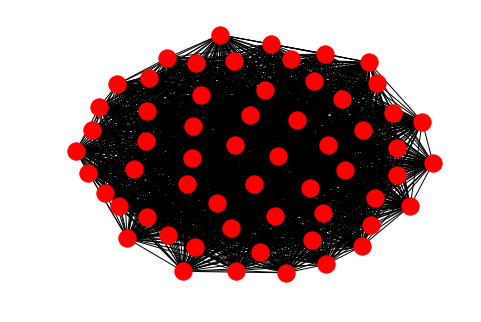

In [17]:
 %matplotlib inline
 nx.draw(friend_graph)